In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv('complaints.csv')

In [5]:
print(df.head())

  Date received                                            Product  \
0    2023-09-04  Money transfer, virtual currency, or money ser...   
1    2023-09-06                                    Debt collection   
2    2023-09-06                        Checking or savings account   
3    2023-09-07                                    Debt collection   
4    2023-09-13  Credit reporting or other personal consumer re...   

                        Sub-product  \
0          Mobile or digital wallet   
1                        Other debt   
2  Other banking product or service   
3                  Credit card debt   
4                  Credit reporting   

                                               Issue  \
0  Trouble accessing funds in your mobile or digi...   
1                  Attempts to collect debt not owed   
2                                Managing an account   
3                              Communication tactics   
4               Incorrect information on your report   

       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065103 entries, 0 to 4065102
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 558.

In [7]:
df.describe()

,Complaint ID
count,4.065103e+06
mean,4.321986e+06
std,2.027344e+06
min,1.000000e+00
25%,2.871812e+06
50%,4.258161e+06
75%,6.145388e+06
max,7.546775e+06


In [8]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716221
Consumer complaint narrative    2592900
Company public response         2184969
Company                               0
State                             43212
ZIP code                          30211
Tags                            3639919
Consumer consent provided?       901575
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3296745
Complaint ID                          0
dtype: int64

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

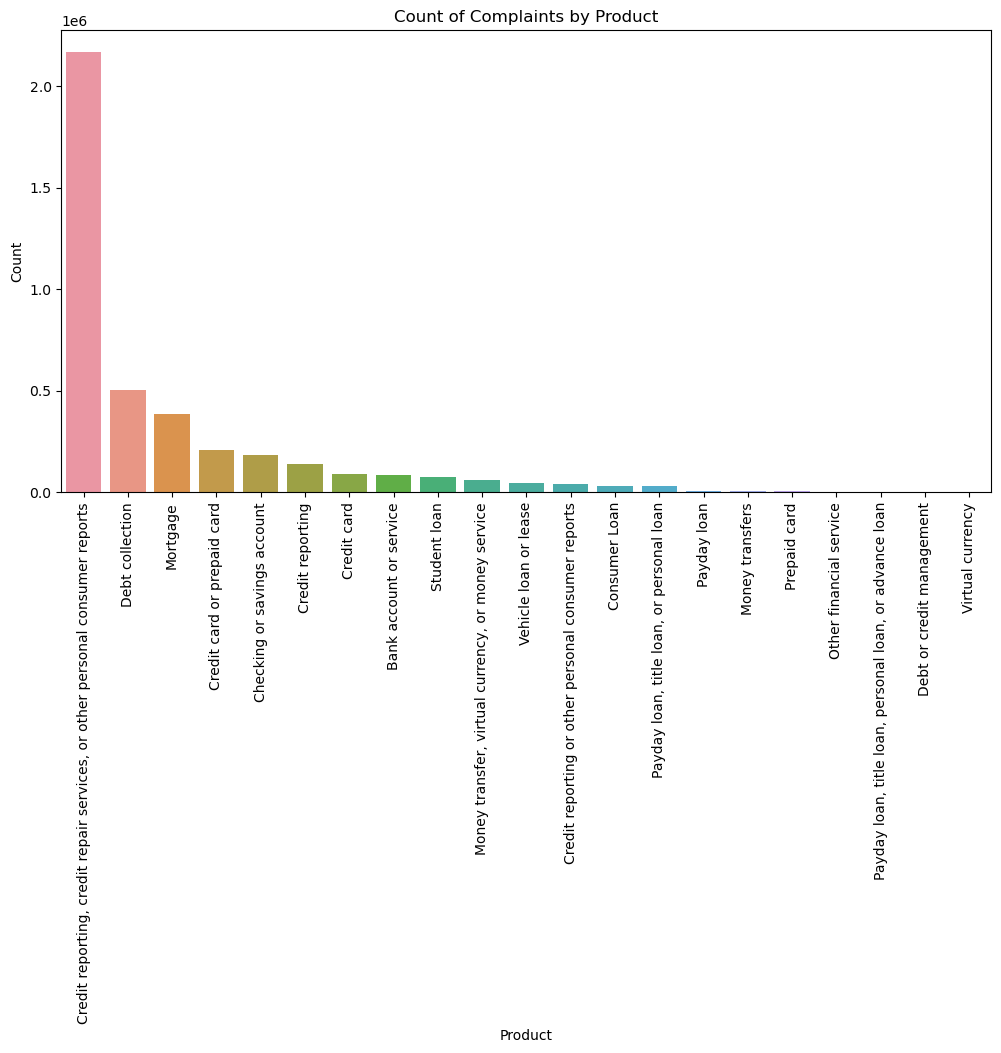

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of Complaints by Product')
plt.show()

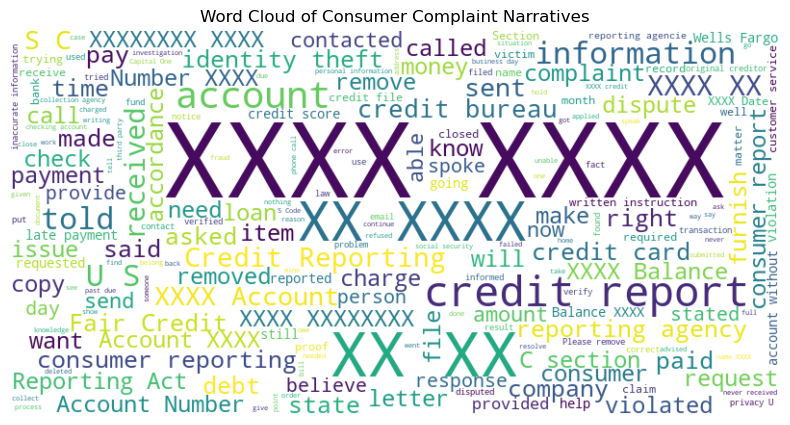

In [10]:
from wordcloud import WordCloud

complaint_text = ' '.join(df['Consumer complaint narrative'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(complaint_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()

In [11]:
'''def text_preprocessing(text):
    # Implement your text pre-processing steps here
    # Example: Convert to lowercase and remove punctuation
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(text_preprocessing)'''

import pandas as pd
import numpy as np  # Import numpy for handling NaN values

def text_preprocessing(text):
    # Check if the input is a string (not NaN)
    if isinstance(text, str):
        # Implement your text pre-processing steps here
        # Example: Convert to lowercase and remove punctuation
        text = text.lower()
        text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Apply the text_preprocessing function to the 'Consumer complaint narrative' column
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(text_preprocessing)

# Replace NaN values with an empty string or any other suitable value
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].replace(np.nan, '')

# Now, the function should handle NaN values without errors

In [12]:
# Step 3: Split data into train and test sets
X = df['Consumer complaint narrative']  # Features (text data)
y = df['Product']  # Target variable (product category)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 4: Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [14]:
# Step 5: Train a Multi-Class Classification Model (Random Forest in this example)
#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train_tfidf, y_train)
'''from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)'''

from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Define the number of iterations or batches
n_iterations = 100  # Adjust as needed

for i in range(n_iterations):
    # Assuming X_train_tfidf and y_train are your training data
    clf.partial_fit(X_train_tfidf, y_train, classes=np.unique(y_train))

    # Calculate the training progress as a percentage
    progress = (i + 1) / n_iterations * 100
    print(f"Training progress: {progress:.2f}%")

# Training is complete
print("Training complete!")

Training progress: 1.00%
Training progress: 2.00%
Training progress: 3.00%
Training progress: 4.00%
Training progress: 5.00%
Training progress: 6.00%
Training progress: 7.00%
Training progress: 8.00%
Training progress: 9.00%
Training progress: 10.00%
Training progress: 11.00%
Training progress: 12.00%
Training progress: 13.00%
Training progress: 14.00%
Training progress: 15.00%
Training progress: 16.00%
Training progress: 17.00%
Training progress: 18.00%
Training progress: 19.00%
Training progress: 20.00%
Training progress: 21.00%
Training progress: 22.00%
Training progress: 23.00%
Training progress: 24.00%
Training progress: 25.00%
Training progress: 26.00%
Training progress: 27.00%
Training progress: 28.00%
Training progress: 29.00%
Training progress: 30.00%
Training progress: 31.00%
Training progress: 32.00%
Training progress: 33.00%
Training progress: 34.00%
Training progress: 35.00%
Training progress: 36.00%
Training progress: 37.00%
Training progress: 38.00%
Training progress: 39

In [15]:
# Step 6: Model Evaluation
y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.63


In [16]:
# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.64      0.04      0.08     17118
                                                 Checking or savings account       0.63      0.33      0.43     36405
                                                               Consumer Loan       0.62      0.02      0.04      6406
                                                                 Credit card       0.72      0.04      0.07     18280
                                                 Credit card or prepaid card       0.63      0.33      0.44     41260
                                                            Credit reporting       0.66      0.01      0.02     28028
                         Credit reporting or other personal consumer reports       0.08      0.00      0.00      8276
Credit reporting, credit repair services, or other pers

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification algorithms:Multinomial Naive Bayes